#### 뉴스 카테고리 분류 모델


[1] 데이터 불러오기 + 합치기<hr>

In [2]:
import pandas as pd
import re
import numpy as np

In [3]:
# 불필요한 컬럼 제외하고 가져오기
eduDF=pd.DataFrame()
envDF=pd.DataFrame()
foodDF=pd.DataFrame()
df_list=[eduDF, envDF, foodDF]
FILE_LIST=['./data/all_0.csv', './data/all_1.csv', './data/all_2.csv']


def make_kor(file, count):
    filterDF=pd.DataFrame()
    dataDF=pd.read_csv(file)         # 파일 읽기
    all=[]
    for text in dataDF['text']:
        a= re.sub('[^ㄱ-ㅎ가-힣.]+',' ',text)         #한글만 남겨놓기
        all.append(a)
    filterDF['text']=all
    filterDF['label']=count
    return filterDF

In [4]:
edu=make_kor(r'C:\Users\KDP-25\Desktop\test\NLP\project\data\all_0.csv',0)
env=make_kor(r'C:\Users\KDP-25\Desktop\test\NLP\project\data\all_1.csv',1)
food=make_kor(r'C:\Users\KDP-25\Desktop\test\NLP\project\data\all_2.csv',2)

edu.info(), env.info(), food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4997 non-null   object
 1   label   4997 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4933 entries, 0 to 4932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4933 non-null   object
 1   label   4933 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 77.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4940 non-null   object
 1   label   4940 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 77.3+ KB


(None, None, None)

In [5]:
# 한 행에 길이가 너무 많은 문장이 있음 -> 한문장당 한행으로 지정

In [6]:
newsDF=pd.concat([edu, env, food])
newsDF['label'].value_counts()

label
0    4997
2    4940
1    4933
Name: count, dtype: int64

[2] 데이터 토큰화 및 불용어 제거 후 단어사전 생성<hr>

In [7]:
from konlpy.tag import Okt
from collections import Counter
from NLPfunc import *

In [8]:
len(newsDF)

14870

In [9]:
# 학습, 테스트 분리 후 DS
newsDF=newsDF.reset_index(drop=True)
trainDF=newsDF.sample(frac=0.9, random_state=100)
testDF=newsDF.drop(trainDF.index)
print(trainDF.index)


# 토큰화 인스턴스
okt=Okt()

Index([  353, 14120,  3734,  7128, 10242, 11632, 11503,  2896,  2551,  9986,
       ...
       10706,  4631,  4532,  7950, 12245,  5963, 12878,  4923,   714,  4469],
      dtype='int64', length=13383)


In [10]:
testDF['label'].value_counts(), trainDF['label'].value_counts()

(label
 0    507
 2    495
 1    485
 Name: count, dtype: int64,
 label
 0    4490
 1    4448
 2    4445
 Name: count, dtype: int64)

In [11]:
## 불용어 리스트 불러오는 함수
STOP_PATH = 'kor_stopwords.txt'


stopwords = make_stopwords(STOP_PATH)

In [12]:
# 토큰화 및 단어사전 생성
train_vocab= make_vocab(data=trainDF['text'], tag=okt, stopwords=stopwords, vocab_num=10000)
# test_vocab= make_vocab(data=testDF['text'], tag=okt, stopwords=stopwords, vocab_num=10000)

print(len(train_vocab))

9741


In [13]:
# 불용어 제거
t_vocab=train_vocab.copy()
for key, v in t_vocab.items():
    if key in stopwords:
        a= train_vocab.pop(key)

In [14]:
train_vocab.items()

dict_items([('<PAD>', 0), ('<UNK>', 1), ('.', 2), ('할', 3), ('서울', 4), ('명', 5), ('기자', 6), ('교사', 7), ('한다', 8), ('학생', 9), ('연합뉴스', 10), ('교육', 11), ('제공', 12), ('의료', 13), ('학교', 14), ('지역', 15), ('시', 16), ('전', 17), ('위', 18), ('사진', 19), ('병원', 20), ('지난', 21), ('며', 22), ('정부', 23), ('원', 24), ('됐다', 25), ('밝혔다', 26), ('지원', 27), ('오후', 28), ('환자', 29), ('사업', 30), ('대한', 31), ('비', 32), ('장', 33), ('대학', 34), ('날', 35), ('뉴스', 36), ('서', 37), ('성', 38), ('관련', 39), ('교육부', 40), ('환경', 41), ('한국', 42), ('통해', 43), ('뉴시스', 44), ('발생', 45), ('교육청', 46), ('운영', 47), ('회', 48), ('문제', 49), ('전국', 50), ('관리', 51), ('계획', 52), ('금지', 53), ('되는', 54), ('해야', 55), ('경우', 56), ('결과', 57), ('진행', 58), ('일본', 59), ('사회', 60), ('연', 61), ('교수', 62), ('따르면', 63), ('하기', 64), ('평가', 65), ('치료', 66), ('센터', 67), ('기관', 68), ('지', 69), ('씨', 70), ('열린', 71), ('오염수', 72), ('올해', 73), ('위원회', 74), ('기준', 75), ('부산', 76), ('재판매', 77), ('현장', 78), ('보다', 79), ('에서는', 80), ('더', 81), ('정책', 82), ('피

In [15]:
# 문장 벡터화
trainVec=vectorize(vocab=train_vocab, DF=trainDF, tokenizer=okt)
testVec=vectorize(vocab=train_vocab, DF=testDF, tokenizer=okt)

In [16]:
# 행당 길이 시각화
len_list=[]
for t in trainVec['text']:
    len_list.append(len(t))
    print(len(t))

3
272
1451
77
199
1131
83
1384
87
218
461
1166
269
338
57
500
49
335
42
136
523
295
279
487
548
85
43
196
605
865
1143
510
541
101
385
729
298
374
424
857
381
691
652
546
511
128
677
351
3
258
421
316
362
370
238
208
679
267
488
669
377
3
499
741
421
181
974
687
706
79
521
673
46
733
104
453
125
50
229
235
354
286
363
508
402
281
383
110
134
775
551
301
349
412
597
406
351
221
624
31
317
329
234
786
75
606
1730
283
362
947
3
578
124
500
912
266
455
328
399
412
314
444
142
136
224
61
468
534
111
109
453
741
309
429
650
398
51
352
251
387
685
876
392
332
162
54
553
1026
577
471
27
46
1368
82
303
58
126
35
712
83
387
391
539
121
2179
573
634
831
320
824
372
631
225
230
236
229
3
383
445
370
87
77
520
694
46
35
283
508
662
56
76
503
810
235
293
414
252
211
352
295
175
348
161
363
191
516
400
338
217
705
234
358
640
345
255
424
1203
380
32
1516
490
235
387
212
87
82
304
117
331
283
213
67
358
1153
644
423
98
256
373
416
477
110
3
329
395
434
77
603
39
283
50
140
592
278
507
178
130
330
512


((array([1.2678e+04, 6.5400e+02, 4.1000e+01, 7.0000e+00, 1.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
  array([   0. ,  948.6, 1897.2, 2845.8, 3794.4, 4743. , 5691.6, 6640.2,
         7588.8, 8537.4, 9486. ]),
  <BarContainer object of 10 artists>),
 388.9232608533214,
 336.0)

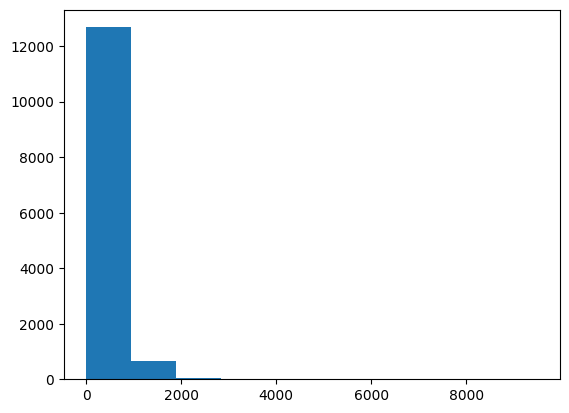

In [17]:
plt.hist(len_list), np.mean(len_list), np.median(len_list)

In [18]:
train_pad=padding(length=310, textList=trainVec['text'])
trainPad=trainVec.copy()
trainPad['text']=train_pad
test_pad= padding(length=310, textList=testVec['text'])
testPad=testVec.copy()
testPad['text']=test_pad

[3] 모델 설계 및 훈련 진행<hr>
- 라벨: 3개 (분류)
- 알고리즘: rnn/ lstm
- 0:교육, 1:환경, 2:의료/식품

In [19]:
# 데이터셋, 데이터로더 생성
import torch

train_tensor=torch.tensor(train_pad)
train_label= torch.FloatTensor(trainVec['label'].values).long()

test_tensor=torch.tensor(test_pad)
test_label= torch.FloatTensor(testVec['label'].values).long()

trainDS=TextDataset(train_tensor, train_label)
testDS= TextDataset(test_tensor, test_label)

trainDL=DataLoader(trainDS, batch_size=50)
testDL=DataLoader(testDS, batch_size=50)


In [20]:
# 데이터로더 확인
for f, t in trainDL:
    print(f.shape)
    break

torch.Size([50, 310])


In [21]:
import torch.nn as nn
from typing import Literal
from torch import optim
import os


In [22]:
# 커스텀 모델 및 파라미터 설정

# 모델 파라미터
n_vocab= len(train_vocab)
hidden_dim= 64
embedding_dim= 128
n_layers= 2
device= 'cuda' if torch.cuda.is_available() else 'cpu'

# 커스텀 모델 생성
classifier= textCLF(
    n_vocab=n_vocab, hidden_dim=hidden_dim, 
    embedding_dim=embedding_dim, n_layers=n_layers, model_type='lstm'
).to(device)

# 최적화 설정
optimizer= optim.Adam(classifier.parameters(), lr=0.01)

# 모델 저장 위치 지정
SAVE_PATH='./model_final/'
SAVE_FILE='newsclf_all.pth'
if not os.path.exists(SAVE_PATH):
    os.mkdir(SAVE_PATH)

In [23]:
from get_model import Custom_model
from torchmetrics.classification import F1Score, MulticlassF1Score, Accuracy
import torch.nn as nn
import torch.nn.functional as F
from torchmetrics.regression import R2Score, MeanSquaredError
import torch
import matplotlib.pyplot as plt
from typing import Literal
import pandas as pd
import torch.optim.lr_scheduler as lr_scheduler
import pickle
from get_train_model import *

In [24]:
import pickle

In [25]:
LOSS_HISTORY, SCORE_HISTORY, ep= model_training(model= classifier, trainDL=trainDL,
                                            testDL=testDL, optimizer=optimizer,
                                            epoch=50, LIMIT=5, SAVE_PATH=SAVE_PATH,
                                            SAVE_FILE=SAVE_FILE, numcls=3,
                                            break_param='score', save_type='all',
                                            type='muticlass', optim_type='score', device=device)


1/50
Train
 Loss: 0.9224241286961
 Score: 0.5045748543161065
Val
 Loss: 0.7508728221058846
 Score: 0.5950450479984284
2/50
Train
 Loss: 0.6216528872166996
 Score: 0.7209294438362122
Val
 Loss: 0.35592781361192466
 Score: 0.8837297260761261
3/50
Train
 Loss: 0.3319383626108739
 Score: 0.9006671151563302
Val
 Loss: 0.2851125918328762
 Score: 0.9250990947087606
4/50
Train
 Loss: 0.26899452649279315
 Score: 0.9228335581163862
Val
 Loss: 0.2724734286467234
 Score: 0.9230991005897522
5/50
Train
 Loss: 0.23787869272558992
 Score: 0.9334328336947
Val
 Loss: 0.283258285621802
 Score: 0.9230991025765737
6/50
Train
 Loss: 0.222122294675392
 Score: 0.9381705079950503
Val
 Loss: 0.26112981997430323
 Score: 0.9237657686074575
7/50
Train
 Loss: 0.20476721271650114
 Score: 0.9430574372188368
Val
 Loss: 0.2563059389280776
 Score: 0.9321981946627299
8/50
Train
 Loss: 0.19325227644850515
 Score: 0.9463048379367857
Val
 Loss: 0.27479255869984626
 Score: 0.9257657667001088
9/50
Train
 Loss: 0.1843635520911

In [26]:
# 단어사전 피클로 저장
with open('vocab.pikle', mode='wb') as f:
    pickle.dump(train_vocab, f)

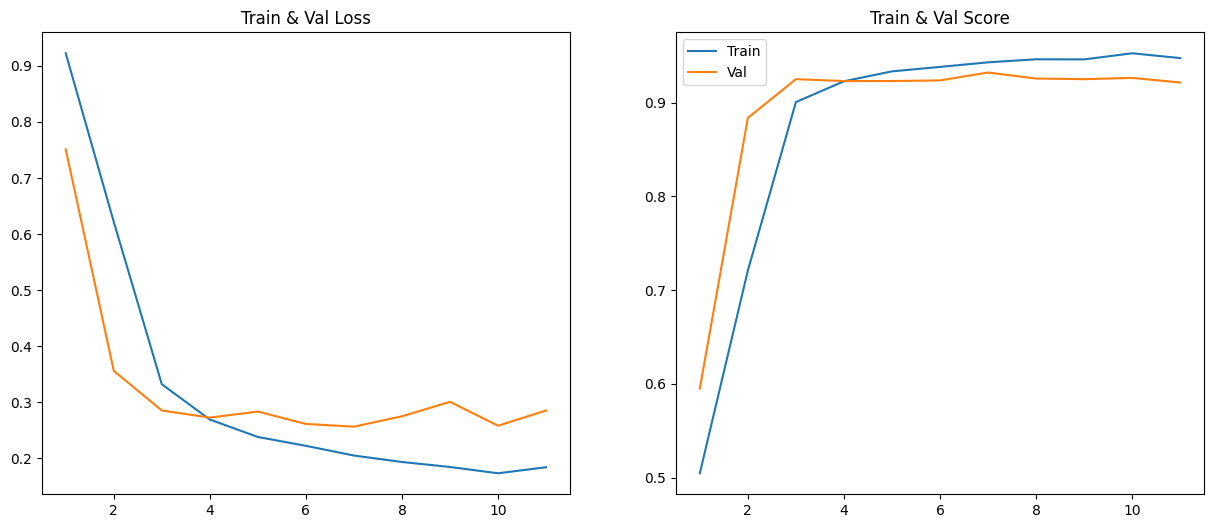

In [27]:
# 시각화
draw_result(EPOCH=ep, LOSS_HISTORY=LOSS_HISTORY, SCORE_HISTORY=SCORE_HISTORY)

In [28]:
def predict_mcf2(model, data, result):
    dataTS=data.reshape(1,-1) #torch.FloatTensor(data).reshape(1,-1)
    pre_val=model(dataTS)
    pre_val=F.softmax(pre_val, dim=1)
    print(f'{result[0]}: {max(pre_val[0].detach()):.4f}')
    return f'{result[0]}: {max(pre_val[0].detach()):.4f}'

In [29]:
# 검증
PATH='./model8newsclf_all.pth'
text='[제주=뉴시스] 양영전 기자 = 제주도교육청은 오는 12~13일 협재해수욕장과 표선해수욕장에서 2024년 제주바다쓰레기저감실천 캠페인 우리 처음 만난 바다처럼을 운영한다고 11일 밝혔다.'
test_model= torch.load(PATH)
from predict import *
# 한글만 남기고 모두 제거
a= re.sub('[^ㄱ-ㅎ가-힣]+',' ',text)
tokenizer=Okt()
# 토큰화
token_text=tokenizer.morphs(a)

#단어사전을 통한 벡터화
# 단어사전 불러오기
with open('vocab.pikle', 'rb') as f:
    test_vocab=pickle.load(f)
# 벡터화
vec_token= vectorize(vocab=test_vocab, DF=token_text, tokenizer=tokenizer)

# 패딩
vec_token= padding(length=50, text=vec_token)
vec_token=vec_token[0]
token_torch=torch.FloatTensor(vec_token).long()
print(token_torch)

test_model.eval()
with torch.no_grad():

    predict_mcf2(model=test_model, data=token_torch, result=['교육', '환경', '음식'])

FileNotFoundError: [Errno 2] No such file or directory: './model8newsclf_all.pth'

In [36]:
from sklearn.metrics import classification_report
# 시도 1 약 90점
model=torch.load('./model_final/try_1.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       507
           1       0.91      0.92      0.91       485
           2       0.89      0.86      0.88       495

    accuracy                           0.90      1487
   macro avg       0.90      0.90      0.90      1487
weighted avg       0.90      0.90      0.90      1487



In [37]:
# 시도 2 
# -> embedding 층 128-> 64
model=torch.load('./model_final/try_2.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       507
           1       0.90      0.92      0.91       485
           2       0.91      0.85      0.88       495

    accuracy                           0.90      1487
   macro avg       0.90      0.90      0.90      1487
weighted avg       0.90      0.90      0.90      1487



In [55]:
# 시도 3
# -> n_layers 2-> 4 
model=torch.load('./model_final/try_3.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
# 성능 약간 다운

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       507
           1       0.86      0.92      0.89       485
           2       0.90      0.83      0.87       495

    accuracy                           0.89      1487
   macro avg       0.89      0.89      0.89      1487
weighted avg       0.89      0.89      0.89      1487



In [65]:
# 시도 4
# -> h_dim 64 -> 32
model=torch.load('./model_final/try_4.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
# 처음이랑 거의 비슷

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       507
           1       0.90      0.93      0.91       485
           2       0.89      0.87      0.88       495

    accuracy                           0.91      1487
   macro avg       0.91      0.91      0.91      1487
weighted avg       0.91      0.91      0.91      1487



In [74]:
# 시도 5
# -> lstm -> rnn
model=torch.load('./model_final/try_5.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
# 진짜 별로네..

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       507
           1       0.45      0.21      0.29       485
           2       0.48      0.61      0.54       495

    accuracy                           0.55      1487
   macro avg       0.53      0.54      0.51      1487
weighted avg       0.53      0.55      0.52      1487



In [176]:
# 최적의 패딩값
# 85 -> 0.91
# 200 -> 0.921
# 367(평균) -> 0.93
# 318(중앙값) -> 0.92
# +++ 패딩값을 늘릴수록 학습이 길어짐..
model=torch.load('./model_final/try_6.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       507
           1       0.90      0.96      0.93       485
           2       0.91      0.89      0.90       495

    accuracy                           0.92      1487
   macro avg       0.92      0.92      0.92      1487
weighted avg       0.92      0.92      0.92      1487

